In [1]:
%logstop
%logstart -ortq ~/.logs/dw.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
from static_grader import grader

# DW Miniproject
## Introduction

The objective of this miniproject is to exercise your ability to wrangle tabular data set and aggregate large data sets into meaningful summary statistics. We'll work with the same medical data used in the `pw` miniproject but leverage the power of Pandas to more efficiently represent and act on our data.

## Downloading the data

We first need to download the data we'll be using from Amazon S3:

In [4]:
# Make directory dw_data
!mkdir dw-data

mkdir: cannot create directory ‘dw-data’: File exists


In [5]:
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201701scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201606scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/practices.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/chem.csv.gz -nc -P ./dw-data/

File ‘./dw-data/201701scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/201606scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/practices.csv.gz’ already there; not retrieving.

File ‘./dw-data/chem.csv.gz’ already there; not retrieving.



## Loading the data

Similar to the `PW` miniproject, the first step is to read in the data. The data files are stored as compressed CSV files. You can load the data into a Pandas DataFrame by making use of the `gzip` package to decompress the files and Panda's `read_csv` methods to parse the data into a DataFrame. You may want to check the Pandas documentation for parsing [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) files for reference.

For a description of the data set please, refer to the [PW miniproject](./pw.ipynb). **Note that all questions make use of the 2017 data only, except for Question 5 which makes use of both the 2017 and 2016 data.**

In [6]:
import pandas as pd
import numpy as np
import gzip

In [7]:
# load the 2017 data
scripts = pd.read_csv('./dw-data/201701scripts_sample.csv.gz')
scripts.head(10)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6
5,N85639,0406000T0,Prochlpzine Mal_Tab 5mg,1,0.97,0.91,28
6,N85639,0407010F0,Co-Codamol_Cap 30mg/500mg,1,0.84,0.89,24
7,N85639,0407010F0,Zapain_Tab 30mg/500mg,1,3.03,2.82,100
8,N85639,0407010H0,Paracet_Oral Susp Paed 120mg/5ml,1,0.62,0.69,100
9,N85639,0501011P0,Phenoxymethylpenicillin Pot_Tab 250mg,2,5.94,5.72,160


In [8]:
scripts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973193 entries, 0 to 973192
Data columns (total 7 columns):
practice    973193 non-null object
bnf_code    973193 non-null object
bnf_name    973193 non-null object
items       973193 non-null int64
nic         973193 non-null float64
act_cost    973193 non-null float64
quantity    973193 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 52.0+ MB


In [9]:
scripts.isnull().sum()

practice    0
bnf_code    0
bnf_name    0
items       0
nic         0
act_cost    0
quantity    0
dtype: int64

In [10]:
scripts.dtypes

practice     object
bnf_code     object
bnf_name     object
items         int64
nic         float64
act_cost    float64
quantity      int64
dtype: object

In [11]:
type(scripts)

pandas.core.frame.DataFrame

In [12]:
col_names=[ 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village', 'post_code']
practices = pd.read_csv('./dw-data/practices.csv.gz', names=col_names)
practices.head(10)

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ
5,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT
6,A81007,BANKHOUSE SURGERY,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW
7,A81008,ALBERT HOUSE CLINIC,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD
8,A81009,VILLAGE MEDICAL CENTRE,THE VILLAGE MEDICAL CTR,400/404 LINTHORPE ROAD,MIDDLESBROUGH,CLEVELAND,TS5 6HF
9,A81011,CHADWICK PRACTICE,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW


In [13]:
practices.tail(10)

,code,name,addr_1,addr_2,borough,village,post_code
12010,Y05703,PRIMARY CARE CONNECT - ANFIELD HEALTH,TOWNSEND LANE NHC,98 TOWNSEND LANE,LIVERPOOL,MERSEYSIDE,L6 0BB
12011,Y05725,ACUTE CARE AT HOME CENTRAL,TRURO HEALTH PARK,INFIRMARY HILL,TRURO,CORNWALL,TR1 2JA
12012,Y05743,NEWARK ACUTE HOME VISITING SERVICE,PICS,UNIT H4 ASH TREE COURT,NOTTINGHAM,NaN,NG8 6PY
12013,Y05744,NEWMEDICA COMMUNITY OPHTHALMOLOGY,CROMWELL PCC,CROMWELL ROAD,GRIMSBY,NORTH EAST LINCOLNSHIRE,DN31 2BH
12014,Y05748,EAST KENT DRUG AND ALCOHOL SERVICE,TRANSPORT HOUSE,DRUM LANE,ASHFORD,KENT,TN23 1LQ
12015,Y05752,MALVERN FRAILTY UNIT,MALVERN COMM. HOSPITAL,185 WORCESTER ROAD,MALVERN,WORCESTERSHIRE,WR14 1EX
12016,Y05757,VC WEST LANCS HC-UCC,ORMSKIRK DG HOSPITAL,WIGAN ROAD,ORMSKIRK,LANCASHIRE,L39 2AZ
12017,Y05758,VC SKELMERSDALE UCC,CONCOURSE SHOPPING CENTRE,116-8 SOUTH WAY,SKELMERSDALE,LANCASHIRE,WN8 6LJ
12018,Y05762,WEST MERTON ACCESS HUB,THE NELSON HEALTH CENTRE,KINGSTON ROAD,WIMBLEDON,NaN,SW20 8DA
12019,Y05763,ELY LOCAL URGENT CARE SERVICE,PRINCESS OF WALES HOSP,LYNN ROAD,ELY,CAMBRIDGSHIRE,CB6 1DN


In [14]:
practices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12020 entries, 0 to 12019
Data columns (total 7 columns):
code         12020 non-null object
name         12020 non-null object
addr_1       12015 non-null object
addr_2       11070 non-null object
borough      11546 non-null object
village      9349 non-null object
post_code    12020 non-null object
dtypes: object(7)
memory usage: 657.5+ KB


In [15]:
practices.isnull().sum()

code            0
name            0
addr_1          5
addr_2        950
borough       474
village      2671
post_code       0
dtype: int64

In [16]:
practices.dtypes

code         object
name         object
addr_1       object
addr_2       object
borough      object
village      object
post_code    object
dtype: object

In [17]:
chem = pd.read_csv('./dw-data/chem.csv.gz')
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [18]:
chem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 2 columns):
CHEM SUB    3487 non-null object
NAME        3487 non-null object
dtypes: object(2)
memory usage: 54.6+ KB


Now that we've loaded in the data, let's first replicate our results from the `PW` miniproject. Note that we are now working with a larger data set so the answers will be different than in the `PW` miniproject even if the analysis is the same.

## Question 1: summary_statistics

In the `PW` miniproject we first calculated the total, mean, standard deviation, and quartile statistics of the `'items'`, `'quantity'`', `'nic'`, and `'act_cost'` fields. To do this we had to write some functions to calculate the statistics and apply the functions to our data structure. The DataFrame has a `describe` method that will calculate most (not all) of these things for us.

Submit the summary statistics to the grader as a list of tuples: [('act_cost', (total, mean, std, q25, median, q75)), ...]

Answer Format:
    
```Python
    summary_stats = [('items', (0,) * 6), 
                     ('quantity', (0,) * 6), 
                     ('nic', (0,) * 6), 
                     ('act_cost', (0,) * 6)]
```

In [19]:
scripts.select_dtypes(include='number').head()

,items,nic,act_cost,quantity
0,1,0.39,0.47,12
1,1,4.38,4.07,30
2,1,1.50,1.40,1
3,1,2.62,2.44,150
4,1,0.16,0.26,6


In [20]:
cols = ['items', 'quantity', 'nic', 'act_cost']
scripts[cols].head()

,items,quantity,nic,act_cost
0,1,12,0.39,0.47
1,1,30,4.38,4.07
2,1,1,1.50,1.40
3,1,150,2.62,2.44
4,1,6,0.16,0.26


In [21]:
scripts[cols].describe()

,items,quantity,nic,act_cost
count,973193.000000,973193.000000,973193.000000,973193.000000
mean,9.133136,741.329835,73.058915,67.986613
std,29.204198,3665.426958,188.070257,174.401703
min,1.000000,0.000000,0.000000,0.040000
25%,1.000000,28.000000,7.800000,7.330000
50%,2.000000,100.000000,22.640000,21.220000
75%,6.000000,350.000000,65.000000,60.670000
max,2384.000000,577720.000000,16320.000000,15108.320000


In [22]:
scripts[cols].describe()[1:7]

,items,quantity,nic,act_cost
mean,9.133136,741.329835,73.058915,67.986613
std,29.204198,3665.426958,188.070257,174.401703
min,1.000000,0.000000,0.000000,0.040000
25%,1.000000,28.000000,7.800000,7.330000
50%,2.000000,100.000000,22.640000,21.220000
75%,6.000000,350.000000,65.000000,60.670000


In [23]:
total_s = scripts[cols].sum()
total_s

items       8.888304e+06
quantity    7.214570e+08
nic         7.110042e+07
act_cost    6.616410e+07
dtype: float64

In [24]:
cols = ['items', 'quantity', 'nic', 'act_cost']
summary_stats = ['mean', 'std', '25%', '50%', '75%']
df = scripts[cols].describe().loc[summary_stats]

In [25]:
df.T

,mean,std,25%,50%,75%
items,9.133136,29.204198,1.00,2.00,6.00
quantity,741.329835,3665.426958,28.00,100.00,350.00
nic,73.058915,188.070257,7.80,22.64,65.00
act_cost,67.986613,174.401703,7.33,21.22,60.67


In [26]:
# To join the Dataframe and Series
ds_join = pd.concat([total_s, df.T], axis=1)
ds_join

,0,mean,std,25%,50%,75%
items,8.888304e+06,9.133136,29.204198,1.00,2.00,6.00
quantity,7.214570e+08,741.329835,3665.426958,28.00,100.00,350.00
nic,7.110042e+07,73.058915,188.070257,7.80,22.64,65.00
act_cost,6.616410e+07,67.986613,174.401703,7.33,21.22,60.67


In [27]:
summary_stats = [(t[0], t[1:]) for t in ds_join.itertuples(name=None)]
print(summary_stats)

[('items', (8888304.0, 9.133135976111625, 29.204198282803603, 1.0, 2.0, 6.0)), ('quantity', (721457006.0, 741.3298348837282, 3665.426958467915, 28.0, 100.0, 350.0)), ('nic', (71100424.84000827, 73.05891517920908, 188.070256906825, 7.8, 22.64, 65.0)), ('act_cost', (66164096.11999956, 67.98661326170655, 174.40170332301963, 7.33, 21.22, 60.67))]


In [28]:
# print([(t[0], t[1:])]) for t in ds_join.interpolate(name=None)

In [29]:
# dir(ds_join)

In [30]:
# summary_stats = [('items', (0,) * 6), ('quantity', (0,) * 6), ('nic', (0,) * 6), ('act_cost', (0,) * 6)]

In [31]:
grader.score.dw__summary_statistics(summary_stats)

Your score:  1.0


## Question 2: most_common_item

We can also easily compute summary statistics on groups within the data. In the `pw` miniproject we had to explicitly construct the groups based on the values of a particular field. Pandas will handle that for us via the `groupby` method. This process is [detailed in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

Use `groupby` to calculate the total number of items dispensed for each `'bnf_name'`. Find the item with the highest total and return the result as `[(bnf_name, total)]`.

In [32]:
scripts.head(2)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30


In [33]:
scripts.tail(5)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
973188,H81615,239410100,Coloplast_SenSura Mio Flex B/Plt 50mm C/,1,78.92,73.06,20
973189,H81615,239410100,Coloplast_SenSura Mio Flex Clsd Bag Mini,1,106.36,98.46,60
973190,H81615,239410100,Coloplast_SenSura Mio Flex Clsd Bag Midi,1,159.54,147.69,90
973191,H81615,239607096,Dansac_Nova 1 Convex Urost Pouch Clr C/F,2,329.76,305.28,60
973192,H81615,239610096,Coloplast_SenSura Mio Urost Bag Maxi Tra,1,182.48,168.93,30


In [34]:
totals = scripts.groupby('bnf_name') ['items'].sum()
max_item = totals.idxmax()
most_common_item = [(max_item, totals[max_item])]
print(most_common_item)

[('Omeprazole_Cap E/C 20mg', 218583)]


In [35]:
totals.head()

bnf_name
365 Film 10cm x 12cm VP Adh Film Dress      2
365 Non Adherent 10cm x 10cm Pfa Plas Fa    3
365 Non Adherent 10cm x 20cm Pfa Plas Fa    1
365 Non Woven Island 8cm x 10cm Adh Dres    1
365 Transpt Island 5cm x 7.2cm VP Adh Fi    2
Name: items, dtype: int64

In [36]:
max_item

'Omeprazole_Cap E/C 20mg'

In [37]:
totals[max_item]

218583

In [38]:
max_num = max(scripts['bnf_name'])
max_num

'palmdoc (Reagent)_Strips'

In [39]:
# most_common_item = [("", 0)]

In [40]:
grader.score.dw__most_common_item(most_common_item)

Your score:  1.0


## Question 3: items_by_region

Now let's find the most common item by post code. The post code information is in the `practices` DataFrame, and we'll need to `merge` it into the `scripts` DataFrame. Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data. The `merge` method is only one of many possible options.

Return your results as a list of tuples `(post code, item name, amount dispensed as % of total)`. Sort your results ascending alphabetically by post code and take only results from the first 100 post codes.

**NOTE:** Some practices have multiple postal codes associated with them. Use the alphabetically first postal code. Note some postal codes may have multiple `'bnf_name'` with the same prescription rate for the maximum. In this case, take the alphabetically first `'bnf_name'` (as in the PW miniproject).

In [41]:
practices.head(5)

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [42]:
scripts.head(5)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [43]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code')
                              .groupby('code')
                              .first()
                              .reset_index()) # reset_index to help make the practices dataframe more compatible with dataframe

In [44]:
unique_practices.head(3)

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,MCKENZIE HOUSE,17 KENDAL ROAD,HARTLEPOOL,CLEVELAND,TS25 1QU


In [45]:
joined = scripts.merge(unique_practices[['code', 'post_code']],
                      left_on = 'practice', right_on = 'code',
                      how='left')

In [46]:
joined.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,code,post_code
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,N85639,CH44 5UF
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,N85639,CH44 5UF
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,N85639,CH44 5UF
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,N85639,CH44 5UF
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,N85639,CH44 5UF


In [47]:
joined.shape

(973193, 9)

In [48]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code')
                              .groupby('code')
                              .first()
                              .reset_index()) # reset_index to help make the practices dataframe more compatible with dataframe

# Merge 'scripts' and 'unique_practices' DataFrames using LEFT join(merge)
joined = scripts.merge(unique_practices[['code', 'post_code']],
                      left_on = 'practice', right_on = 'code',
                      how='left')

In [49]:
# Group 'joined' by 'post_code'
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'].sum()
post_items_total.head(3)

post_code  bnf_name                                
B11 4BW    3m Health Care_Cavilon Durable Barrier C    7
           3m Health Care_Cavilon No Sting Barrier     2
           Abasaglar KwikPen_100u/ml 3ml Pf Pen        2
Name: items, dtype: int64

In [50]:
# Change to a DataFrame
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'].sum().reset_index()
post_items_total.head(3)

,post_code,bnf_name,items
0,B11 4BW,3m Health Care_Cavilon Durable Barrier C,7
1,B11 4BW,3m Health Care_Cavilon No Sting Barrier,2
2,B11 4BW,Abasaglar KwikPen_100u/ml 3ml Pf Pen,2


In [51]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code')
                              .groupby('code')
                              .first()
                              .reset_index()) # reset_index to help make the practices dataframe more compatible with dataframe

# Merge 'scripts' and 'unique_practices' DataFrames using LEFT join(merge)
joined = scripts.merge(unique_practices[['code', 'post_code']],
                      left_on = 'practice', right_on = 'code',
                      how='left')

# Group 'joined' by 'post_code' and bnf_name
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'] \
                                    .sum().reset_index()


In [52]:
max_idx = (post_items_total.groupby('post_code')['items']
                          .idxmax().head())

In [53]:
max_idx

post_code
B11 4BW    1628
B12 9LP    3323
B18 7AL    5293
B21 9RY    6924
B23 6DJ    9096
Name: items, dtype: int64

In [54]:
max_items = post_items_total.loc[max_idx]

In [55]:
max_items.head()

,post_code,bnf_name,items
1628,B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706
3323,B12 9LP,Paracet_Tab 500mg,425
5293,B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556
6924,B21 9RY,Metformin HCl_Tab 500mg,1033
9096,B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599


In [56]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code')
                              .groupby('code')
                              .first()
                              .reset_index()) # reset_index to help make the practices dataframe more compatible with dataframe

# Merge 'scripts' and 'unique_practices' DataFrames using LEFT join(merge)
joined = scripts.merge(unique_practices[['code', 'post_code']],
                      left_on = 'practice', right_on = 'code',
                      how='left')

# Group 'joined' by 'post_code' and bnf_name
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'] \
                                    .sum().reset_index()
    
# Group 'post_items_total' by 'post_code' get 'idxmax'
max_idx = (post_items_total.groupby('post_code')['items']
                          .idxmax())

# Use list of idx to filter 'post_items_total'
max_items = post_items_total.loc[max_idx].set_index('post_code')

In [57]:
post_items = joined.groupby('post_code')['items'].sum()

In [58]:
post_items.head()

post_code
B11 4BW    22731
B12 9LP    17073
B18 7AL    20508
B21 9RY    31027
B23 6DJ    28011
Name: items, dtype: int64

In [59]:
max_items = pd.concat([max_items, post_items], axis=1)
max_items.head()

,bnf_name,items,items
post_code,,,
B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706,22731
B12 9LP,Paracet_Tab 500mg,425,17073
B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556,20508
B21 9RY,Metformin HCl_Tab 500mg,1033,31027
B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599,28011


In [60]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code')
                              .groupby('code')
                              .first()
                              .reset_index()) # reset_index to help make the practices dataframe more compatible with dataframe

# Merge 'scripts' and 'unique_practices' DataFrames using LEFT join(merge)
joined = scripts.merge(unique_practices[['code', 'post_code']],
                      left_on = 'practice', right_on = 'code',
                      how='left')

# Group 'joined' by 'post_code' and bnf_name
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'] \
                                    .sum().reset_index()
    
# Group 'post_items_total' by 'post_code' get 'idxmax'
max_idx = (post_items_total.groupby('post_code')['items']
                          .idxmax())

# Use list of idx to filter 'post_items_total'
max_items = post_items_total.loc[max_idx].set_index('post_code')

# Get 'items' totals for each 'post_code'
post_items = joined.groupby('post_code')['items'].sum().rename('post_item')

# Combine 'max_items' and 'post_totals'
max_items = pd.concat([max_items, post_items], axis=1)

In [61]:
max_items.head()

,bnf_name,items,post_item
post_code,,,
B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706,22731
B12 9LP,Paracet_Tab 500mg,425,17073
B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556,20508
B21 9RY,Metformin HCl_Tab 500mg,1033,31027
B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599,28011


In [62]:
post_items.head(3)

post_code
B11 4BW    22731
B12 9LP    17073
B18 7AL    20508
Name: post_item, dtype: int64

In [63]:
max_items['proportion'] = max_items['items'] / max_items['post_item']
max_items.head()

,bnf_name,items,post_item,proportion
post_code,,,,
B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706,22731,0.031059
B12 9LP,Paracet_Tab 500mg,425,17073,0.024893
B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556,20508,0.027111
B21 9RY,Metformin HCl_Tab 500mg,1033,31027,0.033294
B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599,28011,0.021384


In [64]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code')
                              .groupby('code')
                              .first()
                              .reset_index()) # reset_index to help make the practices dataframe more compatible with dataframe

# Merge 'scripts' and 'unique_practices' DataFrames using LEFT join(merge)
joined = scripts.merge(unique_practices[['code', 'post_code']],
                      left_on = 'practice', right_on = 'code',
                      how='left')

# Group 'joined' by 'post_code' and bnf_name
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'] \
                                    .sum().reset_index()
    
# Group 'post_items_total' by 'post_code' get 'idxmax'
max_idx = (post_items_total.groupby('post_code')['items']
                          .idxmax())

# Use list of idx to filter 'post_items_total'
max_items = post_items_total.loc[max_idx].set_index('post_code')

# Get 'items' totals for each 'post_code'
post_items = joined.groupby('post_code')['items'].sum().rename('post_item')

# Combine 'max_items' and 'post_totals'
max_items = pd.concat([max_items, post_items], axis=1)

# Create 'proportion' column 
max_items['proportion'] = max_items['items'] / max_items['post_item']

In [65]:
# Drop Columns
max_items.drop(['items', 'post_item'], axis=1, inplace=True)
max_items.head()

,bnf_name,proportion
post_code,,
B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,0.031059
B12 9LP,Paracet_Tab 500mg,0.024893
B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,0.027111
B21 9RY,Metformin HCl_Tab 500mg,0.033294
B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),0.021384


In [66]:
# Since the grader wants a list of tuples
items_by_region = list(max_items.itertuples(name=None))[:100
                                                       ]

In [67]:
items_by_region

[('B11 4BW', 'Salbutamol_Inha 100mcg (200 D) CFF', 0.031058906339360346),
 ('B12 9LP', 'Paracet_Tab 500mg', 0.02489310607391788),
 ('B18 7AL', 'Salbutamol_Inha 100mcg (200 D) CFF', 0.027111371172225472),
 ('B21 9RY', 'Metformin HCl_Tab 500mg', 0.03329358300834757),
 ('B23 6DJ', 'Lansoprazole_Cap 30mg (E/C Gran)', 0.021384456106529576),
 ('B61 0AZ', 'Omeprazole_Cap E/C 20mg', 0.028713318284424378),
 ('B70 7AW', 'Paracet_Tab 500mg', 0.025135992162726547),
 ('B72 1RL', 'Omeprazole_Cap E/C 20mg', 0.020228765092141495),
 ('B8 1RZ', 'Metformin HCl_Tab 500mg', 0.021347750961484866),
 ('B9 5PU', 'Ventolin_Evohaler 100mcg (200 D)', 0.024826024522257815),
 ('B90 3LX', 'Omeprazole_Cap E/C 20mg', 0.026965103983080718),
 ('BA5 1XJ', 'Omeprazole_Cap E/C 20mg', 0.028261290947858113),
 ('BB11 2DL', 'Omeprazole_Cap E/C 20mg', 0.027381741821396993),
 ('BB2 1AX', 'Omeprazole_Cap E/C 20mg', 0.03428191046763188),
 ('BB3 1PY', 'Omeprazole_Cap E/C 20mg', 0.032683395995453356),
 ('BB4 5SL', 'Omeprazole_Cap E/

In [68]:
# items_by_region = [("B11 4BW", "Salbutamol_Inha 100mcg (200 D) CFF", 0.0310589063)] * 100

In [69]:
grader.score.dw__items_by_region(items_by_region)

Your score:  1.0


## Question 4: script_anomalies

Drug abuse is a source of human and monetary costs in health care. A first step in identifying practitioners that enable drug abuse is to look for practices where commonly abused drugs are prescribed unusually often. Let's try to find practices that prescribe an unusually high amount of opioids. The opioids we'll look for are given in the list below.

In [70]:
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [71]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


**Opioids** are a class of drugs that include the illegal drug heroin, synthetic opioids such as fentanyl, and pain relievers available legally by prescription, such as oxycodone (OxyContin®), hydrocodone (Vicodin®), codeine, morphine, and many others.

In [72]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine']

These are generic names for drugs, not brand names. Generic drug names can be found using the `'bnf_code'` field in `scripts` along with the `chem` table.. Use the list of opioids provided above along with these fields to make a new field in the `scripts` data that flags whether the row corresponds with a opioid prescription.

In [73]:
chem.shape

(3487, 2)

In [74]:
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [75]:
'|'.join(opioids)

'morphine|oxycodone|methadone|fentanyl|pethidine|buprenorphine|propoxyphene|codeine'

In [76]:
# Create `opioids` column in 'chem' table
mask = chem['NAME'].str.contains('|'.join(opioids), case=False) 
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: NAME, dtype: bool

In [77]:
# Merge scripts and chem
# joined = scripts.merge(chem, left_on='bnf_code', right_on='CHEM SUB', how='left')

In [78]:
# joined.head()

In [79]:
# Create `opioids` column in 'chem' table
mask = chem['NAME'].str.contains('|'.join(opioids), case=False)
bad_drugs = chem[mask]['CHEM SUB'].unique()

# Merge 'scripts' and 'chem' 
scripts['opioid'] = scripts['bnf_code'].isin(bad_drugs).astype(int)

In [80]:
scripts[scripts['opioid']==1].head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid
6,N85639,0407010F0,Co-Codamol_Cap 30mg/500mg,1,0.84,0.89,24,1
7,N85639,0407010F0,Zapain_Tab 30mg/500mg,1,3.03,2.82,100,1
527,N81013,0407010F0,Co-Codamol_Tab 8mg/500mg,37,101.91,96.13,3446,1
528,N81013,0407010F0,Co-Codamol Eff_Tab 8mg/500mg,1,8.53,8.01,124,1
529,N81013,0407010F0,Co-Codamol_Tab 30mg/500mg,14,59.39,55.36,1496,1


In [81]:
scripts[scripts['opioid']==1].head(100)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid
6,N85639,0407010F0,Co-Codamol_Cap 30mg/500mg,1,0.84,0.89,24,1
7,N85639,0407010F0,Zapain_Tab 30mg/500mg,1,3.03,2.82,100,1
527,N81013,0407010F0,Co-Codamol_Tab 8mg/500mg,37,101.91,96.13,3446,1
528,N81013,0407010F0,Co-Codamol Eff_Tab 8mg/500mg,1,8.53,8.01,124,1
529,N81013,0407010F0,Co-Codamol_Tab 30mg/500mg,14,59.39,55.36,1496,1
530,N81013,0407010F0,Co-Codamol_Tab 15mg/500mg,2,10.54,9.99,110,1
531,N81013,0407010F0,Solpadol_Tab Eff 30mg/500mg,4,35.60,33.00,400,1
532,N81013,0407010F0,Zapain_Tab 30mg/500mg,148,504.84,474.38,16662,1
533,N81013,0407010F0,Zapain_Cap 30mg/500mg,6,35.11,32.68,912,1
538,N81013,0407010N0,Co-Dydramol_Tab 10mg/500mg,11,34.69,32.35,1108,1


In [82]:
# scripts.head()

Now for each practice calculate the proportion of its prescriptions containing opioids.

**Hint:** Consider the following list: `[0, 1, 1, 0, 0, 0]`. What proportion of the entries are 1s? What is the mean value?

In [83]:
np.mean([0, 1, 1, 0, 0, 0])

0.3333333333333333

In [84]:
opioids_per_practice = scripts.groupby('practice')['opioid'].mean()

In [85]:
opioids_per_practice.head()

practice
A81005    0.033179
A81007    0.043329
A81011    0.046556
A81012    0.042793
A81017    0.038140
Name: opioid, dtype: float64

In [86]:
scripts['opioid'].mean()

0.03580276471367961

In [87]:
# opioids_per_practice = ...

How do these proportions compare to the overall opioid prescription rate? Subtract off the proportion of all prescriptions that are opioids from each practice's proportion.

In [88]:
relative_opioids_per_practice = opioids_per_practice - scripts['opioid'].mean()

In [89]:
relative_opioids_per_practice.head()

practice
A81005   -0.002624
A81007    0.007526
A81011    0.010753
A81012    0.006990
A81017    0.002337
Name: opioid, dtype: float64

In [90]:
opioids_per_practice.head()

practice
A81005    0.033179
A81007    0.043329
A81011    0.046556
A81012    0.042793
A81017    0.038140
Name: opioid, dtype: float64

Now that we know the difference between each practice's opioid prescription rate and the overall rate, we can identify which practices prescribe opioids at above average or below average rates. However, are the differences from the overall rate important or just random deviations? In other words, are the differences from the overall rate big or small?

To answer this question we have to quantify the difference we would typically expect between a given practice's opioid prescription rate and the overall rate. This quantity is called the **standard error**, and is related to the **standard deviation**, $\sigma$. The standard error in this case is

$$ \frac{\sigma}{\sqrt{n}} $$

where $n$ is the number of prescriptions each practice made. Calculate the standard error for each practice. Then divide `relative_opioids_per_practice` by the standard errors. We'll call the final result `opioid_scores`.

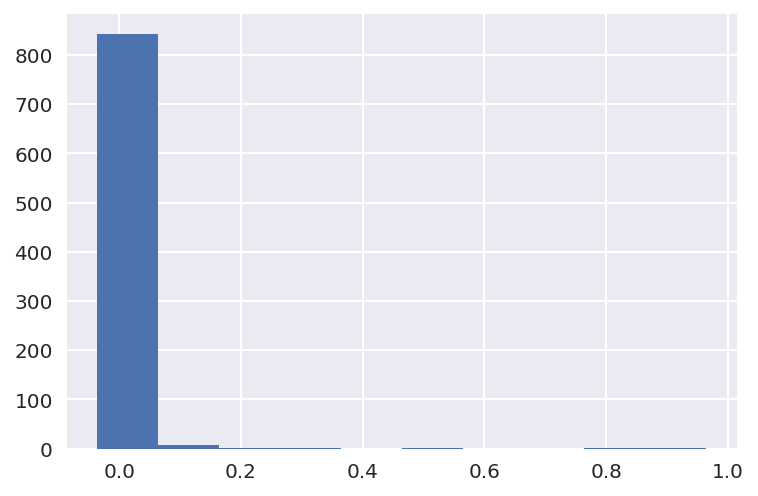

In [91]:
relative_opioids_per_practice.hist()
# This shows skewness 

In [92]:
scripts['opioid'].std()

0.18579817605238425

joined['opioid'].std() / sqrt of the number of scripts written in each practice

In [93]:
joined.practice.value_counts()

N83028    2844
L83100    2797
D81043    2459
B81008    2396
B81026    2347
          ... 
Y05366       1
Y03179       1
Y01174       1
C85617       1
Y03010       1
Name: practice, Length: 856, dtype: int64

In [94]:
scripts['opioid'].std() / np.sqrt(joined.practice.value_counts())

N83028    0.003484
L83100    0.003513
D81043    0.003747
B81008    0.003796
B81026    0.003835
            ...   
Y05366    0.185798
Y03179    0.185798
Y01174    0.185798
C85617    0.185798
Y03010    0.185798
Name: practice, Length: 856, dtype: float64

In [95]:
standard_error_per_practice = scripts['opioid'].std() / np.sqrt(joined.practice.value_counts())
opioid_scores = relative_opioids_per_practice / standard_error_per_practice

In [96]:
standard_error_per_practice.head()

N83028    0.003484
L83100    0.003513
D81043    0.003747
B81008    0.003796
B81026    0.003835
Name: practice, dtype: float64

In [97]:
opioid_scores.head()

A81005   -0.548306
A81007    1.544557
A81011    2.291795
A81012    1.373060
A81017    0.583168
dtype: float64

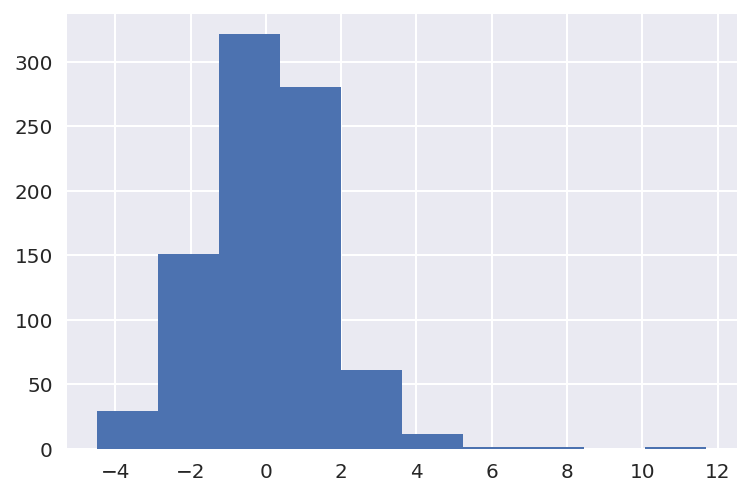

In [98]:
opioid_scores.hist()

The quantity we have calculated in `opioid_scores` is called a **z-score**:

$$ \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} $$

Here $\bar{X}$ corresponds with the proportion for each practice, $\mu$ corresponds with the proportion across all practices, $\sigma^2$ corresponds with the variance of the proportion across all practices, and $n$ is the number of prescriptions made by each practice. Notice $\bar{X}$ and $n$ will be different for each practice, while $\mu$ and $\sigma$ are determined across all prescriptions, and so are the same for every z-score. The z-score is a useful statistical tool used for hypothesis testing, finding outliers, and comparing data about different types of objects or events.

Now that we've calculated this statistic, take the 100 practices with the largest z-score. Return your result as a list of tuples in the form `(practice_name, z-score, number_of_scripts)`. Sort your tuples by z-score in descending order. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [99]:
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [100]:
unique_practices = practices.groupby('code')['name'].min()
# anomalies = [("NATIONAL ENHANCED SERVICE", 11.6958178629, 7)] * 100

In [101]:
type(unique_practices)

pandas.core.series.Series

In [102]:
unique_practices.head()

code
A81001           THE DENSHAM SURGERY
A81002    QUEENS PARK MEDICAL CENTRE
A81003     VICTORIA MEDICAL PRACTICE
A81004       BLUEBELL MEDICAL CENTRE
A81005            SPRINGWOOD SURGERY
Name: name, dtype: object

In [103]:
opioid_scores.head()

A81005   -0.548306
A81007    1.544557
A81011    2.291795
A81012    1.373060
A81017    0.583168
dtype: float64

In [104]:
opioid_scores.to_frame().head()

,0
A81005,-0.548306
A81007,1.544557
A81011,2.291795
A81012,1.373060
A81017,0.583168


In [105]:
anomalies = opioid_scores.rename('scores').to_frame().join(unique_practices, how='left').head()

In [106]:
anomalies.head()

,scores,name
A81005,-0.548306,SPRINGWOOD SURGERY
A81007,1.544557,BANKHOUSE SURGERY
A81011,2.291795,CHADWICK PRACTICE
A81012,1.373060,WESTBOURNE MEDICAL CENTRE
A81017,0.583168,WOODBRIDGE PRACTICE


In [107]:
unique_practices = practices.groupby('code')['name'].min()
# anomalies = [("NATIONAL ENHANCED SERVICE", 11.6958178629, 7)] * 100

anomalies = opioid_scores.rename('scores').to_frame().join(unique_practices, how='left')

In [108]:
scripts['practice'].value_counts()

N83028    2844
L83100    2797
D81043    2459
B81008    2396
B81026    2347
          ... 
Y05366       1
Y03179       1
Y01174       1
C85617       1
Y03010       1
Name: practice, Length: 856, dtype: int64

In [109]:
unique_practices = practices.groupby('code')['name'].min()
# anomalies = [("NATIONAL ENHANCED SERVICE", 11.6958178629, 7)] * 100

anomalies = opioid_scores.rename('scores').to_frame().join(unique_practices, how='left')

anomalies = anomalies.join(scripts['practice'].value_counts(), how='left')

In [110]:
anomalies.head()

,scores,name,practice
A81005,-0.548306,SPRINGWOOD SURGERY,1507
A81007,1.544557,BANKHOUSE SURGERY,1454
A81011,2.291795,CHADWICK PRACTICE,1568
A81012,1.373060,WESTBOURNE MEDICAL CENTRE,1332
A81017,0.583168,WOODBRIDGE PRACTICE,2150


In [111]:
anomalies = anomalies.sort_values('scores', ascending=False).head(100)

In [112]:
anomalies.head()

,scores,name,practice
Y01852,11.695818,NATIONAL ENHANCED SERVICE,7
Y03006,7.339043,OUTREACH SERVICE NH / RH,2
Y03668,6.150582,BRISDOC HEALTHCARE SERVICES OOH,60
G81703,5.123032,H&R P C SPECIAL SCHEME,36
Y04997,4.958866,HMR BARDOC OOH,321


In [113]:
anomalies = anomalies.sort_values('scores', ascending=False).head(100)
anomalies = anomalies[['name', 'scores', 'practice']]
anomalies.head()

,name,scores,practice
Y01852,NATIONAL ENHANCED SERVICE,11.695818,7
Y03006,OUTREACH SERVICE NH / RH,7.339043,2
Y03668,BRISDOC HEALTHCARE SERVICES OOH,6.150582,60
G81703,H&R P C SPECIAL SCHEME,5.123032,36
Y04997,HMR BARDOC OOH,4.958866,321


In [114]:
type(anomalies)

pandas.core.frame.DataFrame

In [115]:
anomalies = list(anomalies.itertuples(index=False, name=None))
anomalies[:3]

[('NATIONAL ENHANCED SERVICE', 11.695817862936027, 7),
 ('OUTREACH SERVICE NH / RH', 7.339043019238823, 2),
 ('BRISDOC HEALTHCARE SERVICES OOH', 6.1505817490838295, 60)]

In [116]:
# results.head()

In [117]:
grader.score.dw__script_anomalies(anomalies)

Your score:  1.0


## Question 5: script_growth

Another way to identify anomalies is by comparing current data to historical data. In the case of identifying sites of drug abuse, we might compare a practice's current rate of opioid prescription to their rate 5 or 10 years ago. Unless the nature of the practice has changed, the profile of drugs they prescribe should be relatively stable. We might also want to identify trends through time for business reasons, identifying drugs that are gaining market share. That's what we'll do in this question.

We'll load in beneficiary data from 6 months earlier, June 2016, and calculate the percent growth in prescription rate from June 2016 to January 2017 for each `bnf_name`. We'll return the 50 items with largest growth and the 50 items with the largest shrinkage (i.e. negative percent growth) as a list of tuples sorted by growth rate in descending order in the format `(script_name, growth_rate, raw_2016_count)`. You'll notice that many of the 50 fastest growing items have low counts of prescriptions in 2016. Filter out any items that were prescribed less than 50 times.

In [118]:
scripts16 = pd.read_csv('./dw-data/201606scripts_sample.csv.gz')
scripts16.head(10)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85638,0301011R0,Salamol_Inha 100mcg (200 D) CFF (Teva),2,2.92,2.73,2
1,N85638,0301011R0,Easyhaler_Salbutamol Sulf 200mcg (200D),1,6.63,6.15,1
2,N85638,0301020I0,Ipratrop Brom_Inh Soln 500mcg/2ml Ud,1,1.77,1.75,12
3,N85638,0301020I0,Ipratrop Brom_Inh Soln 250mcg/1ml Ud,1,4.47,4.15,20
4,N85638,0302000C0,Clenil Modulite_Inha 50mcg (200D),1,3.70,3.44,1
5,N85638,0302000C0,Clenil Modulite_Inha 100mcg (200D),2,14.84,13.76,2
6,N85638,0302000C0,Clenil Modulite_Inha 200mcg (200D),1,16.17,14.98,1
7,N85638,0302000C0,Fostair_Inh 100mcg/6mcg (120D) CFF,3,117.28,108.61,4
8,N85638,0302000K0,Symbicort_Turbohaler 200mcg/6mcg (120 D),2,76.00,70.38,2
9,N85638,0302000K0,Symbicort_Turbohaler 400mcg/12mcg (60 D),1,38.00,35.19,1


In [119]:
from collections import Counter

c = Counter(scripts16['bnf_name'].to_list())

In [120]:
c['Symbicort_Turbohaler 200mcg/6mcg (120 D)']

688

In [121]:
c['Ipratrop Brom_Inh Soln 250mcg/1ml Ud']

176

In [122]:
# Will tell us how many times the drugs appeared in the 'DataFrame'
list(c.items())[:5]

[('Salamol_Inha 100mcg (200 D) CFF (Teva)', 340),
 ('Easyhaler_Salbutamol Sulf 200mcg (200D)', 185),
 ('Ipratrop Brom_Inh Soln 500mcg/2ml Ud', 342),
 ('Ipratrop Brom_Inh Soln 250mcg/1ml Ud', 176),
 ('Clenil Modulite_Inha 50mcg (200D)', 692)]

In [123]:
from collections import Counter

c = Counter(scripts16['bnf_name'].to_list())

# Will tell us how many times the drugs appeared in the 'DataFrame'
list(c.items())[:5]

[('Salamol_Inha 100mcg (200 D) CFF (Teva)', 340),
 ('Easyhaler_Salbutamol Sulf 200mcg (200D)', 185),
 ('Ipratrop Brom_Inh Soln 500mcg/2ml Ud', 342),
 ('Ipratrop Brom_Inh Soln 250mcg/1ml Ud', 176),
 ('Clenil Modulite_Inha 50mcg (200D)', 692)]

In [124]:
# To calculate the percent growth in prescription rate from June 2016 to January 2017 for each bnf_name
pct_growth =( scripts['bnf_name'].value_counts() 
             / scripts16['bnf_name'].value_counts() 
             - 1)

In [125]:
pct_growth.sort_values(ascending=False).head()

Vensir XL_Cap 225mg                     92.000
Fludroxycortide_Tape 7.5cm x 20cm       52.000
Tamiflu_Cap 75mg                        43.000
Enstilar_Foam Aero 50mcg/0.5mg/g        27.125
Memantine HCl_Orodisper Tab 10mg S/F    27.000
Name: bnf_name, dtype: float64

In [126]:
scripts16['bnf_name'].value_counts()

GlucoRX FinePoint Needles Pen Inj Screw     1532
3m Health Care_Cavilon Durable Barrier C     825
Fluclox Sod_Cap 500mg                        796
Amoxicillin_Cap 500mg                        790
Prednisolone_Tab 5mg                         786
                                            ... 
HealthAid_Vit B Comp Suprem Cap                1
Jobst Opaque Class 1 Thigh Open Toe + La       1
Askina Foam 10cm x 10cm Wound Dress Poly       1
Amphotericin_B Loz 10mg S/F                    1
Allopurinol_Oral Soln 100mg/5ml                1
Name: bnf_name, Length: 13540, dtype: int64

In [127]:
pct_growth1 = pd.concat([pct_growth,
                         scripts16.bnf_name.value_counts().rename('counts_16')], 
                        axis=1, 
                        sort=True)

In [128]:
pct_growth1.head()

,bnf_name,counts_16
365 Film 10cm x 12cm VP Adh Film Dress,NaN,NaN
365 Film 15cm x 20cm VP Adh Film Dress,NaN,1.0
365 Film 4cm x 5cm VP Adh Film Dress,NaN,1.0
365 Non Adherent 10cm x 10cm Pfa Plas Fa,0.0,3.0
365 Non Adherent 10cm x 20cm Pfa Plas Fa,NaN,NaN


In [129]:
# To calculate the percent growth in prescription rate from June 2016 to January 2017 for each bnf_name
pct_growth =( scripts['bnf_name'].value_counts() 
             / scripts16['bnf_name'].value_counts() 
             - 1)

pct_growth = pd.concat([pct_growth,
                         scripts16.bnf_name.value_counts().rename('counts_16')], 
                        axis=1, 
                        sort=True)

In [130]:
mask = pct_growth['counts_16'] > 50
pct_growth[mask].sort_values('bnf_name', ascending=False).head()

,bnf_name,counts_16
Butec_Transdermal Patch 5mcg/hr,3.467742,62.0
Butec_Transdermal Patch 10mcg/hr,3.000000,69.0
Fostair NEXThaler_Inh 200mcg/6mcg (120D),1.430233,86.0
Pneumococcal_Vac 0.5ml Vl (23 Valent),1.269430,193.0
Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,1.269231,52.0


In [132]:
# To calculate the percent growth in prescription rate from June 2016 to January 2017 for each bnf_name
pct_growth =( scripts['bnf_name'].value_counts() 
             / scripts16['bnf_name'].value_counts() 
             - 1)
# Add 'bnf_name.value_counts() from 2016'
pct_growth = pd.concat([pct_growth.rename('pct_growth'),
                         scripts16.bnf_name.value_counts().rename('counts_16')], 
                        axis=1, 
                        sort=True)

# Filter and Drop NA
mask = pct_growth['counts_16'] >= 50
filtered_growth = pct_growth[mask].dropna().sort_values('counts_16', ascending=False)

In [133]:
pct_growth.head()

,pct_growth,counts_16
365 Film 10cm x 12cm VP Adh Film Dress,NaN,NaN
365 Film 15cm x 20cm VP Adh Film Dress,NaN,1.0
365 Film 4cm x 5cm VP Adh Film Dress,NaN,1.0
365 Non Adherent 10cm x 10cm Pfa Plas Fa,0.0,3.0
365 Non Adherent 10cm x 20cm Pfa Plas Fa,NaN,NaN


In [134]:
pct_growth.shape

(15424, 2)

In [135]:
pct_growth.iloc[:50]

,pct_growth,counts_16
365 Film 10cm x 12cm VP Adh Film Dress,NaN,NaN
365 Film 15cm x 20cm VP Adh Film Dress,NaN,1.0
365 Film 4cm x 5cm VP Adh Film Dress,NaN,1.0
365 Non Adherent 10cm x 10cm Pfa Plas Fa,0.000000,3.0
365 Non Adherent 10cm x 20cm Pfa Plas Fa,NaN,NaN
365 Non Woven Island 10cm x 10cm Adh Dre,NaN,1.0
365 Non Woven Island 10cm x 15cm Adh Dre,NaN,1.0
365 Non Woven Island 6cm x 8cm Adh Dress,NaN,1.0
365 Non Woven Island 8cm x 10cm Adh Dres,NaN,NaN
365 Transpt Island 12cm x 10cm VP Adh Fi,NaN,4.0


In [136]:
pct_growth.iloc[-50:]

,pct_growth,counts_16
iHealth (Reagent)_Strips,-0.500000,2.0
iMEDicare Select Maint Set Constrictor R,NaN,2.0
iMEDicare SomaCorrect Vacuum Pump,NaN,NaN
iMEDicare SomaCorrect Xtra Vacuum Pump,0.181818,11.0
iMEDicare SomaErect Response II Vacuum P,-0.040000,25.0
iMEDicare SomaErect Response II XL Vacuu,2.000000,2.0
iMEDicare SureEase Maint Set Constrictor,NaN,2.0
iMEDicare Ultimate (Surefit) Maint Set C,0.075000,40.0
iMEDicare Ultra Maint Set Constrictor Ri,0.500000,2.0
iMEDicare_Afex Active L Urin,NaN,NaN


In [137]:
# To calculate the percent growth in prescription rate from June 2016 to January 2017 for each bnf_name
pct_growth =(scripts['bnf_name'].value_counts() 
             / scripts16['bnf_name'].value_counts() 
             - 1)
# Add 'bnf_name.value_counts() from 2016'
pct_growth = pd.concat([pct_growth.rename('pct_growth'),
                         scripts16.bnf_name.value_counts().rename('counts_16')], 
                        axis=1, 
                        sort=True)

# Filter and Drop NA
mask = pct_growth['counts_16'] >= 50
filtered_growth = pct_growth[mask].dropna().sort_values('pct_growth', ascending=False)

# Take 50 first and 50 Last rows
extreme_growth = pd.concat([filtered_growth.iloc[:50], filtered_growth.iloc[-50:]])

# Convert to list
script_growth = list(extreme_growth.itertuples(name=None, index=True))

In [138]:
# extreme_growth = pd.concat([pct_growth[:50], pct_growth[-50:]])

In [139]:
# filtered_growth.head()

In [140]:
# extreme_growth.shape

In [141]:
# extreme_growth.tail()

In [142]:
# pct_growth.tail()

In [143]:
script_growth[:3]

[('Butec_Transdermal Patch 5mcg/hr', 3.467741935483871, 62.0),
 ('Butec_Transdermal Patch 10mcg/hr', 3.0, 69.0),
 ('Fostair NEXThaler_Inh 200mcg/6mcg (120D)', 1.4302325581395348, 86.0)]

In [144]:
# script_growth = [("Butec_Transdermal Patch 5mcg\/hr", 3.4677419355, 62.0)] * 100

In [145]:
grader.score.dw__script_growth(script_growth)

Your score:  1.0


## Question 6: rare_scripts

Does a practice's prescription costs originate from routine care or from reliance on rarely prescribed treatments? Commonplace treatments can carry lower costs than rare treatments because of efficiencies in large-scale production. While some specialist practices can't help but avoid prescribing rare medicines because there are no alternatives, some practices may be prescribing a unnecessary amount of brand-name products when generics are available. Let's identify practices whose costs disproportionately originate from rarely prescribed items.

First we have to identify which `'bnf_code'` are rare. To do this, find the probability $p$ of a prescription having a particular `'bnf_code'` if the `'bnf_code'` was randomly chosen from the unique options in the beneficiary data. We will call a `'bnf_code'` rare if it is prescribed at a rate less than $0.1p$.

In [251]:
scripts[['bnf_code', 'bnf_name']].head()

,bnf_code,bnf_name
0,0106020C0,Bisacodyl_Tab E/C 5mg
1,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g
2,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF
3,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml
4,0401020K0,Diazepam_Tab 2mg


In [255]:
p = 1 / scripts['bnf_code'].nunique()
rates = scripts['bnf_code'].value_counts() / scripts['bnf_code'].count()
rare_codes = rates[rates < .1 * p].index
scripts['rare'] = scripts['bnf_code'].isin(rare_codes)

In [256]:
rates.head()

0906040G0    0.014840
090402000    0.011016
0302000N0    0.010214
130201000    0.008839
0601060D0    0.008799
Name: bnf_code, dtype: float64

In [257]:
p

0.0005063291139240507

In [259]:
rare_codes[:4]

Index(['1001030F0', '236001063', '0503021E0', '239448100'], dtype='object')

In [261]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid,rare
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,0,False
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,0,False
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,0,False
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,0,False
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,0,False


In [262]:
scripts[scripts['rare']].head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid,rare
109,N81013,0106050M0,Citramag_Eff Pdr Sach 29.5g Citrus,1,3.78,3.61,2,0,True
139,N81013,0203020G0,Rythmodan Ret_Tab 250mg,2,64.16,59.42,120,0,True
830,N81013,0603020M0,Solu-Cortef_Inj 100mg Vl + Dil,1,2.32,2.17,2,0,True
945,N81013,0803010K0,Diethylstilbestrol_Tab 1mg,3,361.02,334.26,84,0,True
1204,N81013,1303000F0,Doxepin HCl_Crm 5%,1,11.70,10.84,30,0,True


In [268]:
rare_scripts = scripts[scripts['rare']].copy()

In [269]:
rare_scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid,rare
109,N81013,0106050M0,Citramag_Eff Pdr Sach 29.5g Citrus,1,3.78,3.61,2,0,True
139,N81013,0203020G0,Rythmodan Ret_Tab 250mg,2,64.16,59.42,120,0,True
830,N81013,0603020M0,Solu-Cortef_Inj 100mg Vl + Dil,1,2.32,2.17,2,0,True
945,N81013,0803010K0,Diethylstilbestrol_Tab 1mg,3,361.02,334.26,84,0,True
1204,N81013,1303000F0,Doxepin HCl_Crm 5%,1,11.70,10.84,30,0,True


In [267]:
print(scripts.shape)
print(rare_scripts.shape)

(973193, 9)
(11570, 9)


Now for each practice, calculate the proportion of costs that originate from prescription of rare treatments (i.e. rare `'bnf_code'`). Use the `'act_cost'` field for this calculation.

In [270]:
rare_scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid,rare
109,N81013,0106050M0,Citramag_Eff Pdr Sach 29.5g Citrus,1,3.78,3.61,2,0,True
139,N81013,0203020G0,Rythmodan Ret_Tab 250mg,2,64.16,59.42,120,0,True
830,N81013,0603020M0,Solu-Cortef_Inj 100mg Vl + Dil,1,2.32,2.17,2,0,True
945,N81013,0803010K0,Diethylstilbestrol_Tab 1mg,3,361.02,334.26,84,0,True
1204,N81013,1303000F0,Doxepin HCl_Crm 5%,1,11.70,10.84,30,0,True


In [274]:
rare = scripts[scripts['rare']].groupby('practice')['act_cost'].sum()

In [275]:
rare.head()

practice
A81005    1247.83
A81007     951.06
A81011     816.02
A81012    1145.11
A81017    1712.15
Name: act_cost, dtype: float64

In [278]:
# Check for Null values
rare.isnull().sum()

0

In [281]:
rare = scripts[scripts['rare']].groupby('practice')['act_cost'].sum()

total = scripts.groupby('practice')['act_cost'].sum()

In [283]:
rare_cost_prop = rare / total

In [284]:
rare_cost_prop.head()

practice
A81005    0.012017
A81007    0.008381
A81011    0.005116
A81012    0.013747
A81017    0.007359
Name: act_cost, dtype: float64

In [285]:
rare_cost_prop.isnull().sum()

90

In [286]:
# Fill Null values with '0'
rare_cost_prop = (rare / total).fillna(0)

In [287]:
rare_cost_prop.isnull().sum()

0

In [288]:
rare = scripts[scripts['rare']].groupby('practice')['act_cost'].sum()

total = scripts.groupby('practice')['act_cost'].sum()

rare_cost_prop = (rare / total).fillna(0)

Now we will calculate a z-score for each practice based on this proportion.
First take the difference of `rare_cost_prop` and the proportion of costs originating from rare treatments across all practices.

```python
proportion = (scripts[scripts['rare']]['act_cost'].sum() / scripts['act_cost'].sum())
relative_rare_cost_prop = rare_cost_prop - proportion
```

In [289]:
proportion = scripts[scripts['rare']]['act_cost'].sum() / scripts['act_cost'].sum()

In [291]:
relative_rare_cost_prop = rare_cost_prop - proportion

In [292]:
relative_rare_cost_prop.isnull().sum()

0

In [293]:
relative_rare_cost_prop.head()

practice
A81005   -0.003946
A81007   -0.007582
A81011   -0.010847
A81012   -0.002216
A81017   -0.008604
Name: act_cost, dtype: float64

Now we will estimate the standard errors (i.e. the denominator of the z-score) by simply taking the standard deviation of this difference.

In [294]:
standard_errors = relative_rare_cost_prop.std()

In [295]:
standard_errors

0.06050888706745139

Finally compute the z-scores. Return the practices with the top 100 z-scores in the form `(post_code, practice_name, z-score)`. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [296]:
rare_scores = relative_rare_cost_prop / standard_errors

In [297]:
rare_scores.head()

practice
A81005   -0.065216
A81007   -0.125308
A81011   -0.179263
A81012   -0.036615
A81017   -0.142190
Name: act_cost, dtype: float64

In [350]:
rare_scripts = rare_scores.to_frame().merge(unique_practices,
                            how='left',
                            left_index=True,
                            right_on='code')

In [351]:
rare_scripts.head()

,act_cost,name
code,,
A81005,-0.065216,SPRINGWOOD SURGERY
A81007,-0.125308,BANKHOUSE SURGERY
A81011,-0.179263,CHADWICK PRACTICE
A81012,-0.036615,WESTBOURNE MEDICAL CENTRE
A81017,-0.142190,WOODBRIDGE PRACTICE


In [352]:
practices[['post_code', 'code', 'name']].merge(rare_scores,
                            how='right',
                            right_index = True,
                            left_on='code').head()

,post_code,code,name,act_cost
4,TS14 7DJ,A81005,SPRINGWOOD SURGERY,-0.065216
6,TS24 7PW,A81007,BANKHOUSE SURGERY,-0.125308
9,TS24 7PW,A81011,CHADWICK PRACTICE,-0.179263
10,TS3 6AL,A81012,WESTBOURNE MEDICAL CENTRE,-0.036615
15,TS17 0EE,A81017,WOODBRIDGE PRACTICE,-0.142190


In [353]:
rare_scripts = rare_scripts[['name', 'act_cost']]

In [354]:
rare_scripts.sort_values('act_cost', ascending=False).head()

,name,act_cost
code,,
Y03472,CONSULTANT DIABETES TEAM,16.262687
Y05320,DMC COMMUNITY DERMATOLOGY RBWF,15.128648
Y04404,OUTPATIENTS JUBILEE HEALTH CENTRE,7.542139
Y03484,DMC COMMUNITY DERMATOLOGY CLINIC,7.287222
Y04424,DMC HEALTHCARE,6.838614


In [355]:
rare_scripts = list(rare_scripts.sort_values('act_cost', ascending=False).itertuples(name=None))[:100]

In [362]:
rare_scripts[:5]

[('Y03472', 'CONSULTANT DIABETES TEAM', 16.262687124655073),
 ('Y05320', 'DMC COMMUNITY DERMATOLOGY RBWF', 15.128648195416869),
 ('Y04404', 'OUTPATIENTS JUBILEE HEALTH CENTRE', 7.54213935610462),
 ('Y03484', 'DMC COMMUNITY DERMATOLOGY CLINIC', 7.287222200297828),
 ('Y04424', 'DMC HEALTHCARE', 6.838614181432866)]

In [363]:
# rare_scripts = [("Y03472", "CONSULTANT DIABETES TEAM", 16.2626871247)] * 100

In [364]:
grader.score.dw__rare_scripts(rare_scripts)

Your score:  1.0


*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*